<a href="https://colab.research.google.com/github/dana344-m/iris-rbfn-classifier/blob/main/iris_rbfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['species']=iris.target
iris_df.to_csv('iris.csv',index=False)
print('huh')
iris_df.head()


huh


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


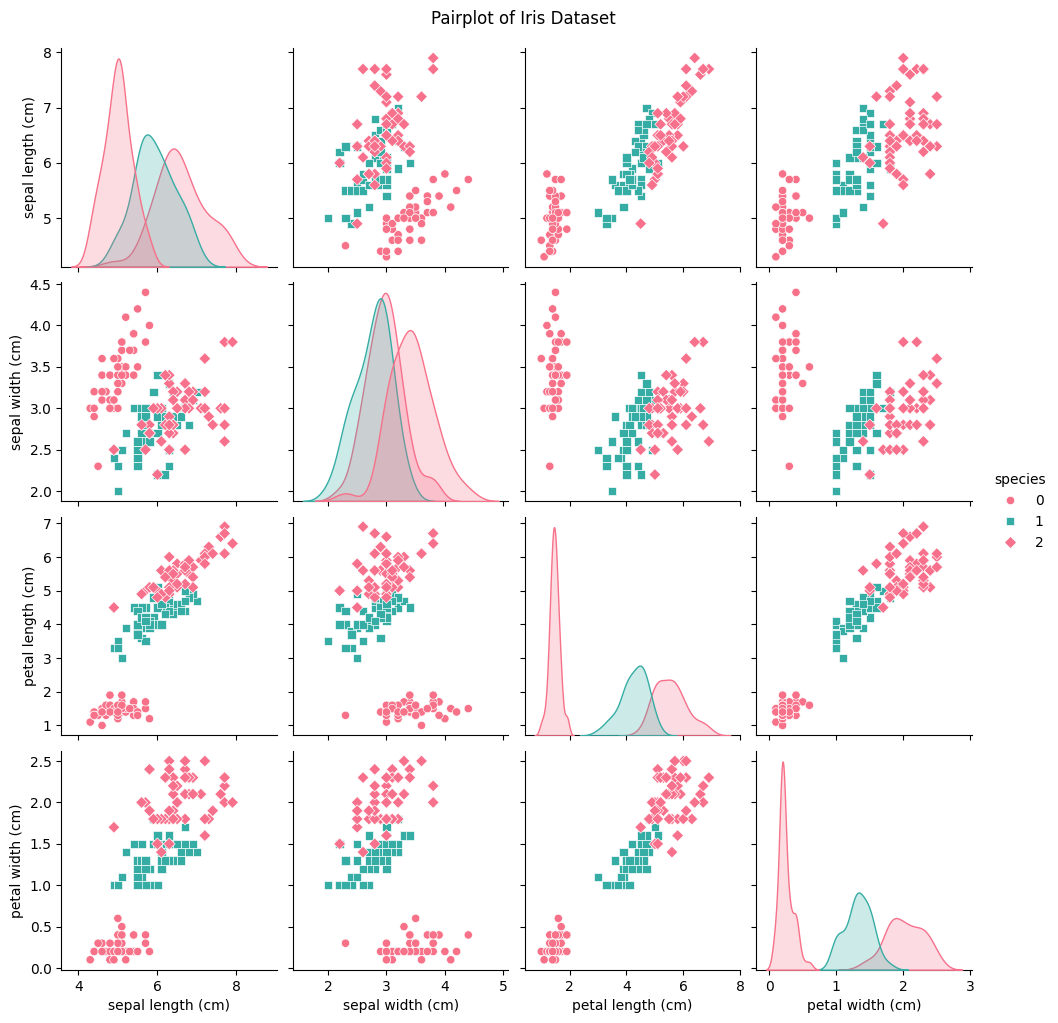

In [ ]:
sns.pairplot(iris_df, hue='species', palette='husl', markers=["o", "s", "D"],
             diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [ ]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class RBFN:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):

        if isinstance(X, pd.DataFrame):
            X = X.values  # Access underlying NumPy array


        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]


        phi = self._calculate_phi(X)


        self.weights = np.linalg.solve(phi.T @ phi, phi.T @ y)

    def predict(self, X):

        if isinstance(X, pd.DataFrame):
            X = X.values

        phi = self._calculate_phi(X)
        return phi @ self.weights

    def _calculate_phi(self, X):
        phi = np.zeros((X.shape[0], self.num_centers))
        for i, x in enumerate(X):
            for j, c in enumerate(self.centers):
                phi[i, j] = np.exp(-np.linalg.norm(x - c)**2 / (2 * self.sigma**2))
        return phi

In [ ]:
rbfn = RBFN(num_centers=10, sigma=1.0)
rbfn.fit(X_train, y_train)

#predictions
y_pred = rbfn.predict(X_test)


In [ ]:
y_pred_classes = np.round(y_pred).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-score: 0.966750208855472


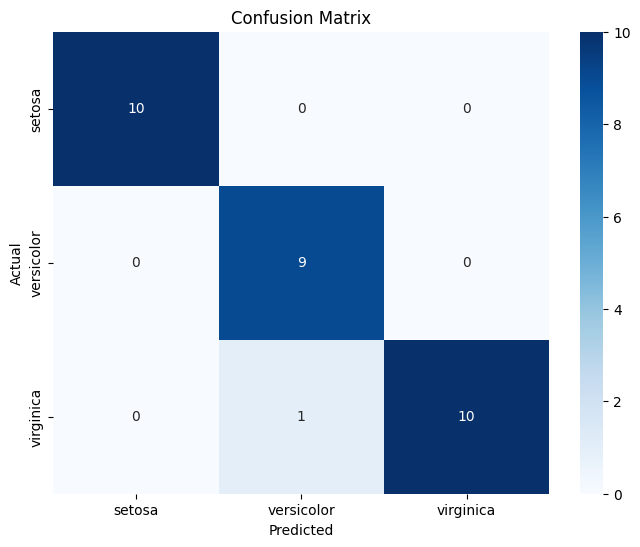

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

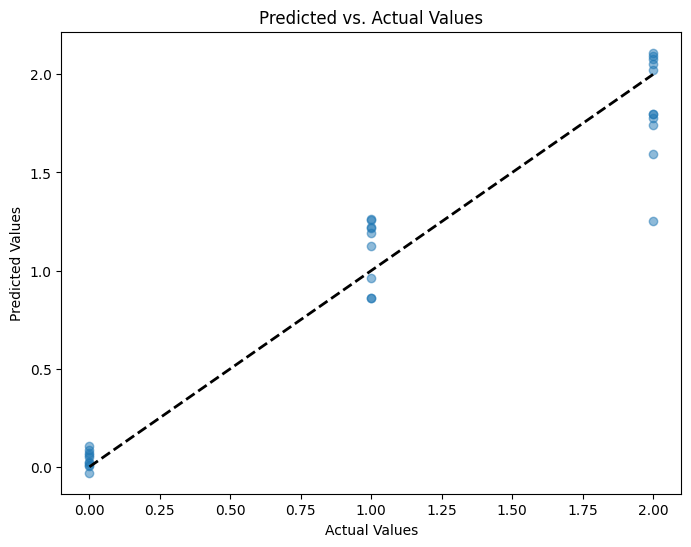

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  #real vs predicted ploting
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()